In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./DF_SPLIT/비강남.csv')
# df.drop('건물연식',axis=1,inplace=True)
# Train : 2016-2020
# Test : 2021-2022

df['계약일'] = pd.to_datetime(df['계약일'])
train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']
# Train Split
# feature & target  split
X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']
# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

# Test Split
# feature & target  split
X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']
# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif


# OLS - Scaling 후

## OLS_1

In [3]:
# R_OLS_1
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               367830
Model:                            RLM   Df Residuals:                   367810
Method:                          IRLS   Df Model:                           19
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        16:09:03                                         
No. Iterations:                    35                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4609      0.007    617.358      0.000       4.447       4.475
건물면적(㎡)               1.3030      0.002    549.340      0.000       1.298       1.308
층                     0.2451      0.003     83.893      0.000       0.239       0.251
KOSPI종가               0.0295      0.006      5.235      0.000       0.018       0.040
Fed기준금리              -0.0975      0.003    -29.327      0.000      -0.104      -0.091
국제유가(Dubai)($/배럴)     0.0994      0.003     31.123      0.000       0.093       0.106
부동산거래량                0.0308      0.002     17.892      0.000       0.027       0.034
국고채5년(평균)            -0.1121      0.017     -6.446      0.000      -0.146      -0.078
국고채10년(평균)            0.1311      0.013     10.161      0.000       0.106       0.156
회사채3년(평균)             0.0695      0.005     13.567      0.000       0.059       0.080
CD91물(평균)            -0.0441      0.007     -5.953      0.000      -0.059      -0.030
BOK기준금리              -0.0576      0.006     -9.230      0.000      -0.070      -0.045
건물연식                 -0.1902      0.002   -119.147      0.000      -0.193      -0.187
GDP대비가계부채비율           0.1114      0.005     21.093      0.000       0.101       0.122
환율종가                  0.0251      0.003      9.111      0.000       0.020       0.031
선행지수순환변동치             0.0767      0.004     18.449      0.000       0.069       0.085
EPU                  -0.0014      0.002     -0.806      0.420      -0.005       0.002
장단기금리spread          -0.1833      0.008    -23.331      0.000      -0.199      -0.168
금값종가                  0.0323      0.005      6.316      0.000       0.022       0.042
LTV                  -0.1717      0.002    -87.664      0.000      -0.176      -0.168
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [4]:
X_scaled.drop('EPU', axis=1, inplace=True)

In [6]:
# R_OLS_2
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               367830
Model:                            RLM   Df Residuals:                   367811
Method:                          IRLS   Df Model:                           18
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        16:10:06                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4596      0.007    633.414      0.000       4.446       4.473
건물면적(㎡)               1.3030      0.002    549.388      0.000       1.298       1.308
층                     0.2451      0.003     83.893      0.000       0.239       0.251
KOSPI종가               0.0298      0.006      5.308      0.000       0.019       0.041
Fed기준금리              -0.0972      0.003    -29.421      0.000      -0.104      -0.091
국제유가(Dubai)($/배럴)     0.0988      0.003     31.868      0.000       0.093       0.105
부동산거래량                0.0312      0.002     19.044      0.000       0.028       0.034
국고채5년(평균)            -0.1152      0.017     -6.782      0.000      -0.148      -0.082
국고채10년(평균)            0.1322      0.013     10.317      0.000       0.107       0.157
회사채3년(평균)             0.0706      0.005     14.297      0.000       0.061       0.080
CD91물(평균)            -0.0433      0.007     -5.905      0.000      -0.058      -0.029
BOK기준금리              -0.0569      0.006     -9.191      0.000      -0.069      -0.045
건물연식                 -0.1901      0.002   -119.142      0.000      -0.193      -0.187
GDP대비가계부채비율           0.1110      0.005     21.113      0.000       0.101       0.121
환율종가                  0.0245      0.003      9.234      0.000       0.019       0.030
선행지수순환변동치             0.0770      0.004     18.564      0.000       0.069       0.085
장단기금리spread          -0.1826      0.008    -23.399      0.000      -0.198      -0.167
금값종가                  0.0328      0.005      6.431      0.000       0.023       0.043
LTV                  -0.1718      0.002    -87.756      0.000      -0.176      -0.168
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [7]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

     VIF_Factor            Feature
0      7.236101            건물면적(㎡)
1      5.320292                  층
2    152.777097            KOSPI종가
3     53.327410            Fed기준금리
4     61.344314  국제유가(Dubai)($/배럴)
5      9.677279             부동산거래량
6   1185.952282          국고채5년(평균)
7    858.250539         국고채10년(평균)
8    120.719830          회사채3년(평균)
9    281.643501          CD91물(평균)
10   254.853883            BOK기준금리
11     5.971137               건물연식
12   105.336432        GDP대비가계부채비율
13    24.070366               환율종가
14   121.713693          선행지수순환변동치
15   205.940811        장단기금리spread
16    65.691570               금값종가
17    31.006827                LTV


In [8]:
X_scaled.drop('국고채5년(평균)', axis=1, inplace=True)

In [9]:
# R_OLS_3
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               367830
Model:                            RLM   Df Residuals:                   367812
Method:                          IRLS   Df Model:                           17
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        16:12:42                                         
No. Iterations:                    37                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4802      0.006    702.175      0.000       4.468       4.493
건물면적(㎡)               1.3031      0.002    549.349      0.000       1.298       1.308
층                     0.2450      0.003     83.871      0.000       0.239       0.251
KOSPI종가               0.0305      0.006      5.440      0.000       0.020       0.041
Fed기준금리              -0.1025      0.003    -32.082      0.000      -0.109      -0.096
국제유가(Dubai)($/배럴)     0.0975      0.003     31.525      0.000       0.091       0.104
부동산거래량                0.0321      0.002     19.676      0.000       0.029       0.035
국고채10년(평균)            0.0638      0.008      8.368      0.000       0.049       0.079
회사채3년(평균)             0.0617      0.005     12.905      0.000       0.052       0.071
CD91물(평균)            -0.0624      0.007     -9.143      0.000      -0.076      -0.049
BOK기준금리              -0.0743      0.006    -13.147      0.000      -0.085      -0.063
건물연식                 -0.1901      0.002   -119.126      0.000      -0.193      -0.187
GDP대비가계부채비율           0.1201      0.005     23.635      0.000       0.110       0.130
환율종가                  0.0304      0.003     12.150      0.000       0.026       0.035
선행지수순환변동치             0.0800      0.004     19.423      0.000       0.072       0.088
장단기금리spread          -0.2164      0.006    -35.592      0.000      -0.228      -0.204
금값종가                  0.0247      0.005      5.002      0.000       0.015       0.034
LTV                  -0.1692      0.002    -87.816      0.000      -0.173      -0.165
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [10]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     7.210639            건물면적(㎡)
1     5.314500                  층
2   148.014266            KOSPI종가
3    47.899870            Fed기준금리
4    61.262362  국제유가(Dubai)($/배럴)
5     9.673192             부동산거래량
6   246.134459         국고채10년(평균)
7   112.612652          회사채3년(평균)
8   274.215103          CD91물(평균)
9   233.888686            BOK기준금리
10    5.965293               건물연식
11   89.990179        GDP대비가계부채비율
12   16.647475               환율종가
13  119.338162          선행지수순환변동치
14  152.238674        장단기금리spread
15   63.957182               금값종가
16   26.106611                LTV


In [11]:
X_scaled.drop('CD91물(평균)', axis=1, inplace=True)

In [12]:
# R_OLS_4
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               367830
Model:                            RLM   Df Residuals:                   367813
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        16:13:39                                         
No. Iterations:                    31                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4511      0.006    809.145      0.000       4.440       4.462
건물면적(㎡)               1.3033      0.002    549.475      0.000       1.299       1.308
층                     0.2450      0.003     83.874      0.000       0.239       0.251
KOSPI종가               0.0432      0.005      7.952      0.000       0.033       0.054
Fed기준금리              -0.1074      0.003    -34.048      0.000      -0.114      -0.101
국제유가(Dubai)($/배럴)     0.0987      0.003     31.968      0.000       0.093       0.105
부동산거래량                0.0298      0.002     18.527      0.000       0.027       0.033
국고채10년(평균)            0.0214      0.006      3.557      0.000       0.010       0.033
회사채3년(평균)             0.0749      0.005     16.392      0.000       0.066       0.084
BOK기준금리              -0.1025      0.005    -21.647      0.000      -0.112      -0.093
건물연식                 -0.1902      0.002   -119.156      0.000      -0.193      -0.187
GDP대비가계부채비율           0.1213      0.005     23.876      0.000       0.111       0.131
환율종가                  0.0340      0.002     13.740      0.000       0.029       0.039
선행지수순환변동치             0.0939      0.004     24.450      0.000       0.086       0.101
장단기금리spread          -0.2048      0.006    -34.546      0.000      -0.216      -0.193
금값종가                  0.0267      0.005      5.397      0.000       0.017       0.036
LTV                  -0.1685      0.002    -87.582      0.000      -0.172      -0.165
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [13]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     7.177526            건물면적(㎡)
1     5.299914                  층
2   146.892350            KOSPI종가
3    47.728246            Fed기준금리
4    61.215452  국제유가(Dubai)($/배럴)
5     9.570420             부동산거래량
6   184.239975         국고채10년(평균)
7    95.554245          회사채3년(평균)
8    71.999638            BOK기준금리
9     5.951806               건물연식
10   86.909399        GDP대비가계부채비율
11   16.137816               환율종가
12  102.287026          선행지수순환변동치
13  151.061108        장단기금리spread
14   63.886152               금값종가
15   24.117938                LTV


In [14]:
X_scaled.drop('국고채10년(평균)', axis=1, inplace=True)

In [5]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

     VIF_Factor            Feature
0      7.236101            건물면적(㎡)
1      5.320292                  층
2    152.777097            KOSPI종가
3     53.327410            Fed기준금리
4     61.344314  국제유가(Dubai)($/배럴)
5      9.677279             부동산거래량
6   1185.952282          국고채5년(평균)
7    858.250539         국고채10년(평균)
8    120.719830          회사채3년(평균)
9    281.643501          CD91물(평균)
10   254.853883            BOK기준금리
11     5.971137               건물연식
12   105.336432        GDP대비가계부채비율
13    24.070366               환율종가
14   121.713693          선행지수순환변동치
15   205.940811        장단기금리spread
16    65.691570               금값종가
17    31.006827                LTV


In [15]:
# R_OLS_5
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               367830
Model:                            RLM   Df Residuals:                   367814
Method:                          IRLS   Df Model:                           15
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        16:14:35                                         
No. Iterations:                    35                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4470      0.005    824.342      0.000       4.436       4.458
건물면적(㎡)               1.3033      0.002    549.429      0.000       1.299       1.308
층                     0.2451      0.003     83.872      0.000       0.239       0.251
KOSPI종가               0.0407      0.005      7.559      0.000       0.030       0.051
Fed기준금리              -0.1054      0.003    -34.012      0.000      -0.112      -0.099
국제유가(Dubai)($/배럴)     0.0984      0.003     31.865      0.000       0.092       0.104
부동산거래량                0.0294      0.002     18.312      0.000       0.026       0.033
회사채3년(평균)             0.0850      0.004     23.212      0.000       0.078       0.092
BOK기준금리              -0.0965      0.004    -21.682      0.000      -0.105      -0.088
건물연식                 -0.1901      0.002   -119.079      0.000      -0.193      -0.187
GDP대비가계부채비율           0.1215      0.005     23.922      0.000       0.112       0.131
환율종가                  0.0355      0.002     14.515      0.000       0.031       0.040
선행지수순환변동치             0.0994      0.004     28.209      0.000       0.093       0.106
장단기금리spread          -0.1977      0.006    -35.561      0.000      -0.209      -0.187
금값종가                  0.0228      0.005      4.740      0.000       0.013       0.032
LTV                  -0.1679      0.002    -87.585      0.000      -0.172      -0.164
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [16]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     7.166523            건물면적(㎡)
1     5.298051                  층
2   141.858019            KOSPI종가
3    45.334452            Fed기준금리
4    61.121572  국제유가(Dubai)($/배럴)
5     9.543894             부동산거래량
6    49.590159          회사채3년(평균)
7    65.362747            BOK기준금리
8     5.951007               건물연식
9    86.354811        GDP대비가계부채비율
10   16.087353               환율종가
11   82.824744          선행지수순환변동치
12  138.223479        장단기금리spread
13   59.662171               금값종가
14   24.106622                LTV


In [17]:
X_scaled.drop('KOSPI종가', axis=1, inplace=True)

In [18]:
# R_OLS_6
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               367830
Model:                            RLM   Df Residuals:                   367815
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        16:16:09                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4598      0.005    868.502      0.000       4.450       4.470
건물면적(㎡)               1.3029      0.002    549.270      0.000       1.298       1.308
층                     0.2450      0.003     83.847      0.000       0.239       0.251
Fed기준금리              -0.1056      0.003    -34.073      0.000      -0.112      -0.100
국제유가(Dubai)($/배럴)     0.1010      0.003     32.951      0.000       0.095       0.107
부동산거래량                0.0328      0.002     21.174      0.000       0.030       0.036
회사채3년(평균)             0.0976      0.003     29.759      0.000       0.091       0.104
BOK기준금리              -0.0984      0.004    -22.134      0.000      -0.107      -0.090
건물연식                 -0.1900      0.002   -119.026      0.000      -0.193      -0.187
GDP대비가계부채비율           0.1215      0.005     23.924      0.000       0.112       0.132
환율종가                  0.0297      0.002     12.850      0.000       0.025       0.034
선행지수순환변동치             0.1189      0.002     48.548      0.000       0.114       0.124
장단기금리spread          -0.2130      0.005    -40.894      0.000      -0.223      -0.203
금값종가                  0.0355      0.005      7.836      0.000       0.027       0.044
LTV                  -0.1722      0.002    -93.742      0.000      -0.176      -0.169
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [19]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     7.157403            건물면적(㎡)
1     5.293046                  층
2    45.066897            Fed기준금리
3    59.949232  국제유가(Dubai)($/배럴)
4     8.906013             부동산거래량
5    43.433204          회사채3년(평균)
6    59.475355            BOK기준금리
7     5.941074               건물연식
8    84.467960        GDP대비가계부채비율
9    15.481247               환율종가
10   42.369996          선행지수순환변동치
11  130.421062        장단기금리spread
12   48.576750               금값종가
13   23.583082                LTV


In [20]:
X_scaled.drop('장단기금리spread', axis=1, inplace=True)

In [21]:
# R_OLS_7
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               367830
Model:                            RLM   Df Residuals:                   367816
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        16:16:56                                         
No. Iterations:                    30                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.3650      0.005    949.617      0.000       4.356       4.374
건물면적(㎡)               1.3050      0.002    548.936      0.000       1.300       1.310
층                     0.2460      0.003     84.000      0.000       0.240       0.252
Fed기준금리              -0.0869      0.003    -28.254      0.000      -0.093      -0.081
국제유가(Dubai)($/배럴)     0.0597      0.003     20.504      0.000       0.054       0.065
부동산거래량                0.0172      0.002     11.423      0.000       0.014       0.020
회사채3년(평균)            -0.0237      0.001    -17.072      0.000      -0.026      -0.021
BOK기준금리              -0.0079      0.004     -2.052      0.040      -0.016      -0.000
건물연식                 -0.1904      0.002   -118.954      0.000      -0.193      -0.187
GDP대비가계부채비율           0.1710      0.005     34.622      0.000       0.161       0.181
환율종가                  0.0253      0.002     10.928      0.000       0.021       0.030
선행지수순환변동치             0.0505      0.002     28.259      0.000       0.047       0.054
금값종가                  0.0602      0.004     13.369      0.000       0.051       0.069
LTV                  -0.1496      0.002    -85.268      0.000      -0.153      -0.146
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [22]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     7.131843            건물면적(㎡)
1     5.281400                  층
2    41.605528            Fed기준금리
3    50.215516  국제유가(Dubai)($/배럴)
4     8.146926             부동산거래량
5     9.458425          회사채3년(평균)
6    55.550311            BOK기준금리
7     5.923222               건물연식
8    84.034325        GDP대비가계부채비율
9    13.519826               환율종가
10   18.206694          선행지수순환변동치
11   48.537949               금값종가
12   23.348652                LTV


In [23]:
X_scaled.drop('GDP대비가계부채비율', axis=1, inplace=True)

In [24]:
# R_OLS_8
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               367830
Model:                            RLM   Df Residuals:                   367817
Method:                          IRLS   Df Model:                           12
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        16:17:44                                         
No. Iterations:                    31                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4200      0.004   1024.044      0.000       4.412       4.428
건물면적(㎡)               1.3018      0.002    546.593      0.000       1.297       1.307
층                     0.2453      0.003     83.479      0.000       0.240       0.251
Fed기준금리              -0.0338      0.003    -12.716      0.000      -0.039      -0.029
국제유가(Dubai)($/배럴)     0.0762      0.003     26.453      0.000       0.071       0.082
부동산거래량                0.0210      0.002     13.971      0.000       0.018       0.024
회사채3년(평균)            -0.0093      0.001     -7.013      0.000      -0.012      -0.007
BOK기준금리              -0.0950      0.003    -32.175      0.000      -0.101      -0.089
건물연식                 -0.1875      0.002   -116.860      0.000      -0.191      -0.184
환율종가                  0.0351      0.002     15.203      0.000       0.031       0.040
선행지수순환변동치             0.0491      0.002     27.430      0.000       0.046       0.053
금값종가                  0.1654      0.003     50.006      0.000       0.159       0.172
LTV                  -0.1696      0.002   -101.745      0.000      -0.173      -0.166
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [25]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     7.131040            건물면적(㎡)
1     5.275610                  층
2    33.433919            Fed기준금리
3    46.233366  국제유가(Dubai)($/배럴)
4     8.005813             부동산거래량
5     8.631673          회사채3년(평균)
6    34.673316            BOK기준금리
7     5.890853               건물연식
8    11.207152               환율종가
9    17.802148          선행지수순환변동치
10   10.156996               금값종가
11   22.401624                LTV


In [26]:
X_scaled.drop('국제유가(Dubai)($/배럴)', axis=1, inplace=True)

In [27]:
# R_OLS_9
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               367830
Model:                            RLM   Df Residuals:                   367818
Method:                          IRLS   Df Model:                           11
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        16:18:15                                         
No. Iterations:                    29                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4608      0.004   1102.026      0.000       4.453       4.469
건물면적(㎡)        1.3026      0.002    546.317      0.000       1.298       1.307
층              0.2453      0.003     83.382      0.000       0.240       0.251
Fed기준금리        0.0092      0.002      4.357      0.000       0.005       0.013
부동산거래량         0.0295      0.001     20.141      0.000       0.027       0.032
회사채3년(평균)      0.0009      0.001      0.726      0.468      -0.002       0.003
BOK기준금리       -0.1045      0.003    -35.594      0.000      -0.110      -0.099
건물연식          -0.1877      0.002   -116.858      0.000      -0.191      -0.185
환율종가           0.0087      0.002      4.151      0.000       0.005       0.013
선행지수순환변동치      0.0412      0.002     23.263      0.000       0.038       0.045
금값종가           0.1549      0.003     47.143      0.000       0.148       0.161
LTV           -0.1696      0.002   -101.670      0.000      -0.173      -0.166
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [28]:
X_scaled.drop('회사채3년(평균)', axis=1, inplace=True)

In [29]:
# R_OLS_10
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               367830
Model:                            RLM   Df Residuals:                   367819
Method:                          IRLS   Df Model:                           10
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        16:18:48                                         
No. Iterations:                    33                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4613      0.004   1119.458      0.000       4.453       4.469
건물면적(㎡)        1.3026      0.002    546.324      0.000       1.298       1.307
층              0.2452      0.003     83.375      0.000       0.239       0.251
Fed기준금리        0.0094      0.002      4.480      0.000       0.005       0.013
부동산거래량         0.0293      0.001     20.279      0.000       0.027       0.032
BOK기준금리       -0.1048      0.003    -36.098      0.000      -0.110      -0.099
건물연식          -0.1877      0.002   -116.881      0.000      -0.191      -0.185
환율종가           0.0085      0.002      4.107      0.000       0.004       0.013
선행지수순환변동치      0.0418      0.002     26.189      0.000       0.039       0.045
금값종가           0.1550      0.003     47.154      0.000       0.149       0.161
LTV           -0.1699      0.002   -103.949      0.000      -0.173      -0.167
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [30]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    7.087474    건물면적(㎡)
1    5.264298          층
2   21.129657    Fed기준금리
3    7.069474     부동산거래량
4   33.300196    BOK기준금리
5    5.863166       건물연식
6   10.357313       환율종가
7   11.928261  선행지수순환변동치
8    8.765414       금값종가
9   21.517876        LTV


In [31]:
X_scaled.drop('BOK기준금리', axis=1, inplace=True)

In [32]:
# R_OLS_11
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               367830
Model:                            RLM   Df Residuals:                   367820
Method:                          IRLS   Df Model:                            9
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        16:19:28                                         
No. Iterations:                    50                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3584      0.003   1538.219      0.000       4.353       4.364
건물면적(㎡)        1.3028      0.002    545.093      0.000       1.298       1.307
층              0.2451      0.003     83.119      0.000       0.239       0.251
Fed기준금리       -0.0320      0.002    -18.234      0.000      -0.035      -0.029
부동산거래량         0.0504      0.001     37.850      0.000       0.048       0.053
건물연식          -0.1851      0.002   -115.058      0.000      -0.188      -0.182
환율종가           0.0358      0.002     18.437      0.000       0.032       0.040
선행지수순환변동치      0.0709      0.001     50.809      0.000       0.068       0.074
금값종가           0.2385      0.002    101.417      0.000       0.234       0.243
LTV           -0.1798      0.002   -111.279      0.000      -0.183      -0.177
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [33]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    6.834743    건물면적(㎡)
1    5.173875          층
2    5.645497    Fed기준금리
3    6.449174     부동산거래량
4    5.796897       건물연식
5   10.200428       환율종가
6   11.672320  선행지수순환변동치
7    8.032773       금값종가
8   12.961649        LTV


In [34]:
X_scaled.drop('LTV', axis=1, inplace=True)

In [35]:
# R_OLS_12
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               367830
Model:                            RLM   Df Residuals:                   367821
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 02 Jul 2023                                         
Time:                        16:19:56                                         
No. Iterations:                    28                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1420      0.002   1958.303      0.000       4.138       4.146
건물면적(㎡)        1.3248      0.002    546.967      0.000       1.320       1.330
층              0.2542      0.003     84.907      0.000       0.248       0.260
Fed기준금리        0.1348      0.001    144.032      0.000       0.133       0.137
부동산거래량         0.0283      0.001     21.148      0.000       0.026       0.031
건물연식          -0.1910      0.002   -116.980      0.000      -0.194      -0.188
환율종가           0.0378      0.002     19.149      0.000       0.034       0.042
선행지수순환변동치      0.0285      0.001     20.919      0.000       0.026       0.031
금값종가           0.4215      0.002    252.115      0.000       0.418       0.425
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [36]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    6.676925    건물면적(㎡)
1    5.076413          층
2    2.888976    Fed기준금리
3    6.237290     부동산거래량
4    5.511706       건물연식
5    6.682921       환율종가
6    4.626396  선행지수순환변동치
7    6.199302       금값종가


### R_OLS 결과
 - 건물면적(㎡),층,Fed기준금리,부동산거래량,건물연식,환율종가,선행지수순환변동치, 금값종가

In [37]:
# 각 숫자형 변수들의 피어슨 상관 분포를 히트맵으로 출력
def plot_cor(df):

    df_ = df.select_dtypes(include=[np.number])
    df_cor = df_.corr(method='pearson')
    plt.figure(figsize = (15, 15))
    plt.rc('font', family = 'Malgun Gothic')
    sns.heatmap(df_cor, 
                xticklabels = df_cor.columns, 
                yticklabels = df_cor.columns, 
                cmap = 'coolwarm', 
                annot = True,
                annot_kws = {'size':10}, 
                linewidth = 3,
                vmin=-1, vmax=1)

c:\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


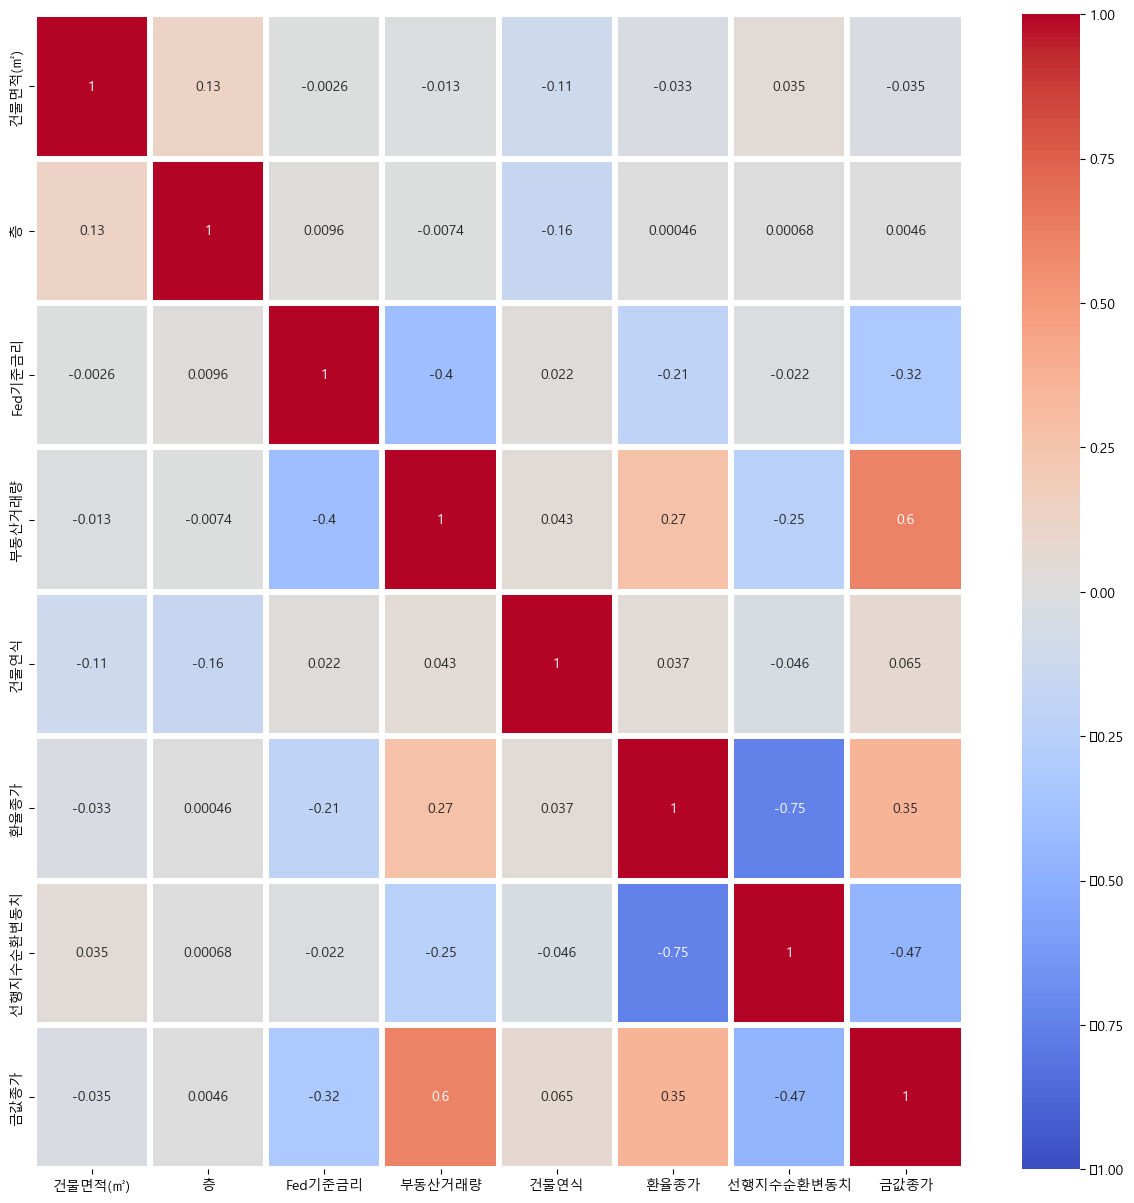

In [38]:
plot_cor(X_scaled)

In [39]:
# 교차 검증 수행
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

mlr = LinearRegression()

cross_val_scores = cross_val_score(mlr, X_scaled, y_scaled, scoring='neg_mean_squared_error', cv=5)
cross_val_rmse_scores = np.sqrt(-cross_val_scores)
avg_cross_val_rmse = np.mean(cross_val_rmse_scores)
print('Average Cross-Validated RMSE: {:.3f}'.format(avg_cross_val_rmse))
print(f'교차검증별 MSE : {np.round(-cross_val_scores,4)}')
print(f'교차검증 평균 MSE : {np.round(np.mean(-cross_val_scores),5)}')
print(f'교차검증별 RMSE : {np.sqrt(np.round(-cross_val_scores,4))}')
print(f'교차검증 평균 RMSE : {np.sqrt(np.round(np.mean(-cross_val_scores),5))}')

Average Cross-Validated RMSE: 0.152
교차검증별 MSE : [0.0176 0.0167 0.0211 0.0296 0.0331]
교차검증 평균 MSE : 0.02362
교차검증별 RMSE : [0.13266499 0.12922848 0.14525839 0.17204651 0.18193405]
교차검증 평균 RMSE : 0.15368799562750501


In [40]:
X_scaled.columns

Index(['건물면적(㎡)', '층', 'Fed기준금리', '부동산거래량', '건물연식', '환율종가', '선행지수순환변동치',
       '금값종가'],
      dtype='object')

In [41]:
X_test_scaled=X_test_scaled[X_scaled.columns]

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
mlr = LinearRegression()
# 모델을 훈련하고 교차 검증을 수행
cv_results = cross_validate(mlr, X_scaled, y_scaled, cv=5, return_estimator=True)

# 교차 검증 결과에서 각 폴드에서 훈련된 모델을 가져옴
trained_models = cv_results['estimator']
# 각 폴드에서 훈련된 모델을 테스트 데이터에 적용
for model in trained_models:
    y_pred = model.predict(X_test_scaled)
    # 예측 결과를 활용하여 원하는 작업을 수행
    mse = mean_squared_error(y_test_scaled, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled,y_pred)
    print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
    print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
    print('\n')

MSE : 0.05278777980923975, RMSE :  0.230, MAE: 0.230
Variance score :  0.461


MSE : 0.05258285344285908, RMSE :  0.229, MAE: 0.229
Variance score :  0.463


MSE : 0.05156991535560294, RMSE :  0.227, MAE: 0.227
Variance score :  0.473


MSE : 0.05021589049416048, RMSE :  0.224, MAE: 0.224
Variance score :  0.487


MSE : 0.0631950987523245, RMSE :  0.251, MAE: 0.251
Variance score :  0.355




In [43]:
from sklearn.model_selection import cross_validate

y_pred = trained_models[3].predict(X_test_scaled)

mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))

MSE : 0.05021589049416048, RMSE :  0.224, MAE: 0.224
Variance score :  0.487


In [44]:
# test 계수 결과 DF 

test_result = pd.DataFrame(data= X_test_scaled.columns)
test_result.columns = ['features']

test_result['coefficient'] = trained_models[3].coef_

test_result.sort_values('coefficient', ascending=False)

,features,coefficient
0,건물면적(㎡),1.349966
7,금값종가,0.402761
1,층,0.244981
2,Fed기준금리,0.097812
6,선행지수순환변동치,0.051797
3,부동산거래량,0.033167
5,환율종가,0.030568
4,건물연식,-0.129976


# 잔차항 검정 
1. 정규성
2. 등분산성
3. 독립성

In [45]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
#matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

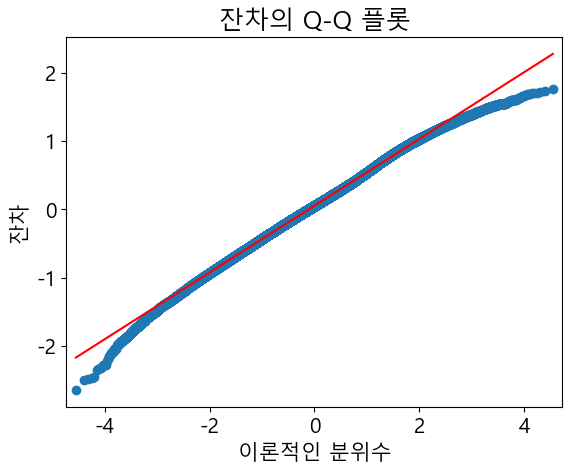

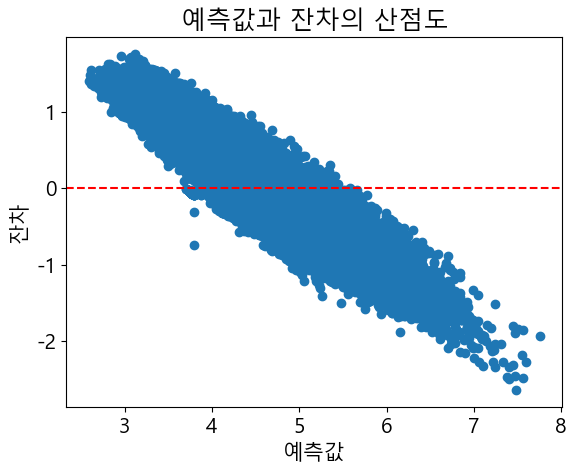

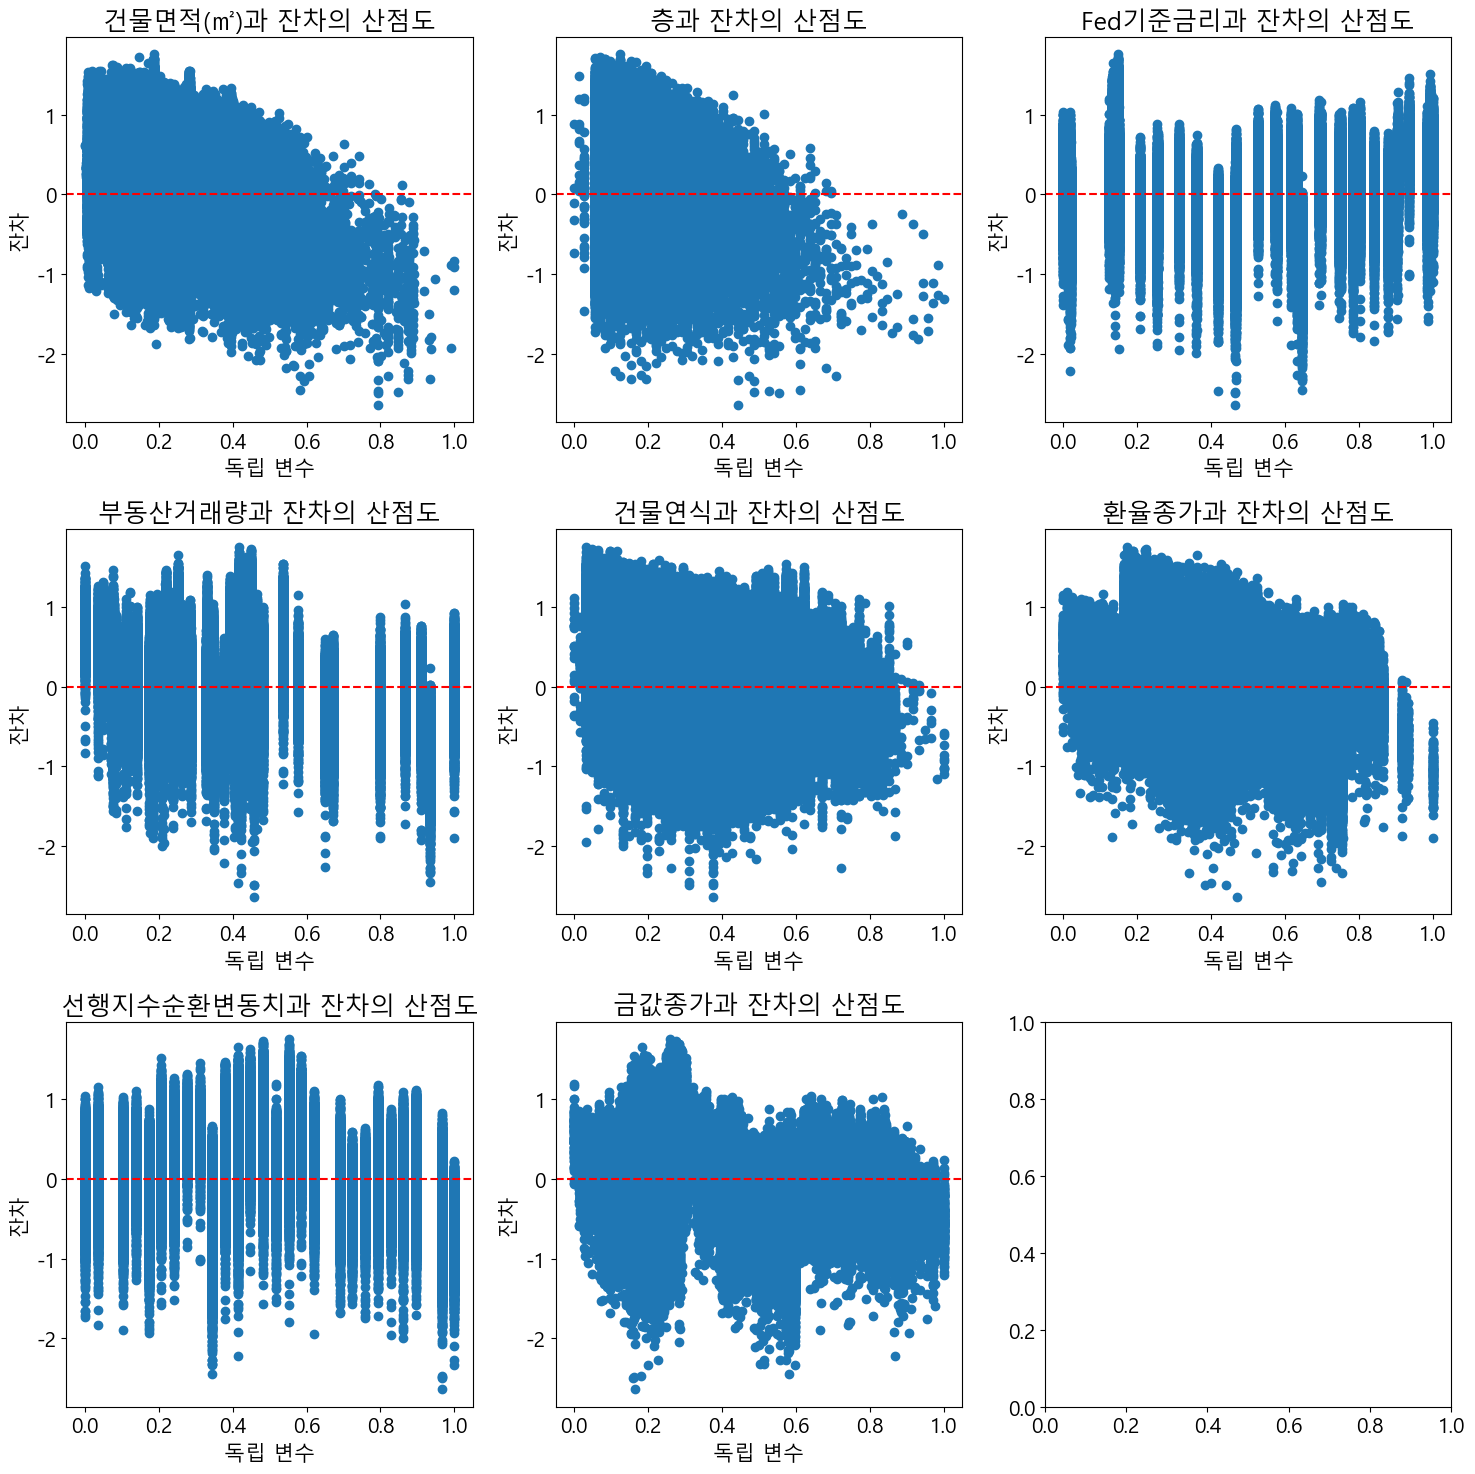

In [46]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

x = X_scaled
y = y_scaled

# 모델 적합
model = sm.OLS(y, x)  # 종속 변수 y와 독립 변수 X를 지정하여 모델 생성
result = model.fit()  # 모델 적합

# 잔차 추출
residuals = result.resid

# 잔차 분석
# 잔차의 정규성 확인: 잔차의 분포를 정규분포와 비교하여 정규성 검정을 수행합니다.
sm.qqplot(residuals, line='s')  # Q-Q plot을 그려서 정규성 확인
plt.xlabel('이론적인 분위수')
plt.ylabel('잔차')
plt.title('잔차의 Q-Q 플롯')
plt.show()

# 잔차의 등분산성 확인: 잔차와 예측값 사이의 관계를 살펴서 등분산성을 확인합니다.
plt.scatter(result.fittedvalues, residuals)
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('예측값과 잔차의 산점도')
plt.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가
plt.show()

# 잔차의 독립성 확인: 잔차와 독립 변수 간의 관계를 살펴서 독립성을 확인합니다.
num_cols = len(x.columns)
num_rows = math.ceil(num_cols / 3)  # 3개의 열로 나누어 출력하고자 한다면
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
for i in range(num_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.scatter(x.iloc[:, i], residuals)
    ax.set_xlabel('독립 변수')
    ax.set_ylabel('잔차')
    ax.set_title(f'{x.columns[i]}과 잔차의 산점도')
    ax.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가

plt.tight_layout()  # 그래프 간격 조정
plt.show()